# Feature descipition:
* genre: Type of song
* artist_name: Artist name 
* track_name: The name of the song
* track_id: The Spotify ID for the track.
* popularity: Popularity percentage of the song
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* duration_ms: The duration of the track in milliseconds.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<font size="5">Firstly I will import pandas, numpy, seaborn, download dataframe. Also let's see how this dataframe looks like.

In [2]:

import pandas as pd
import numpy as np

import seaborn as sns

df = pd.read_csv('D:\Programming_Projects\ML_Classic_spotify\SpotifyFeatures.csv')
df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


<font size="5">Let's check types of features, and aslo check if dataframe Nan has data</font>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

<font size="5">Dataframe doesn't have any Nan data. Great!

<font size="5">Now let's build a correlation matrix and a heatmap for it so we can understand what features affect on popularity.

<AxesSubplot:>

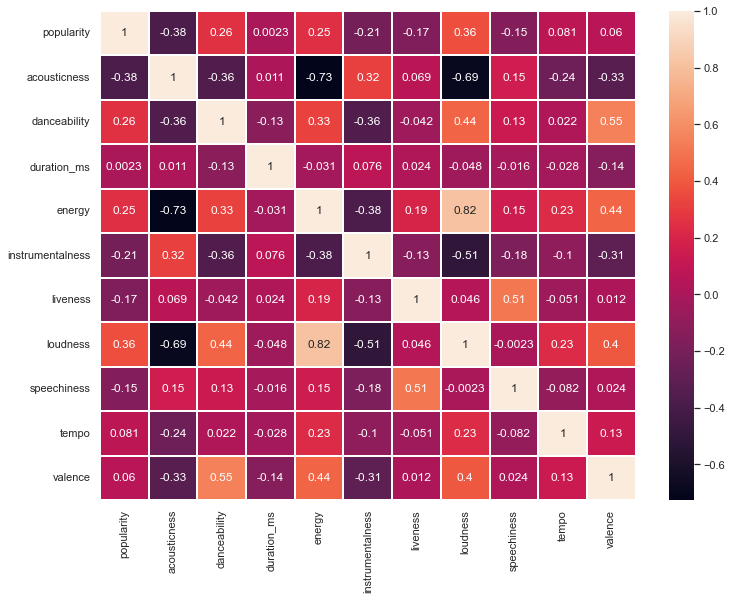

In [5]:
numeric=df.select_dtypes(exclude=['object'])
correlation_mtrx=numeric.corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(correlation_mtrx, annot=True, linewidths=0.1)

<AxesSubplot:title={'center':'acousticness'}, xlabel='acousticness', ylabel='popularity'>

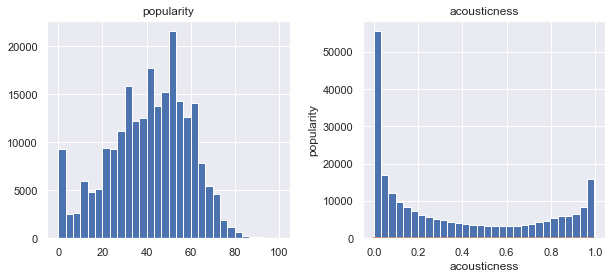

In [6]:
features = ["popularity", "acousticness"]
df[features].hist(figsize=(10, 4), bins=30);
sns.lineplot(x="acousticness", y="popularity", data=df[features])

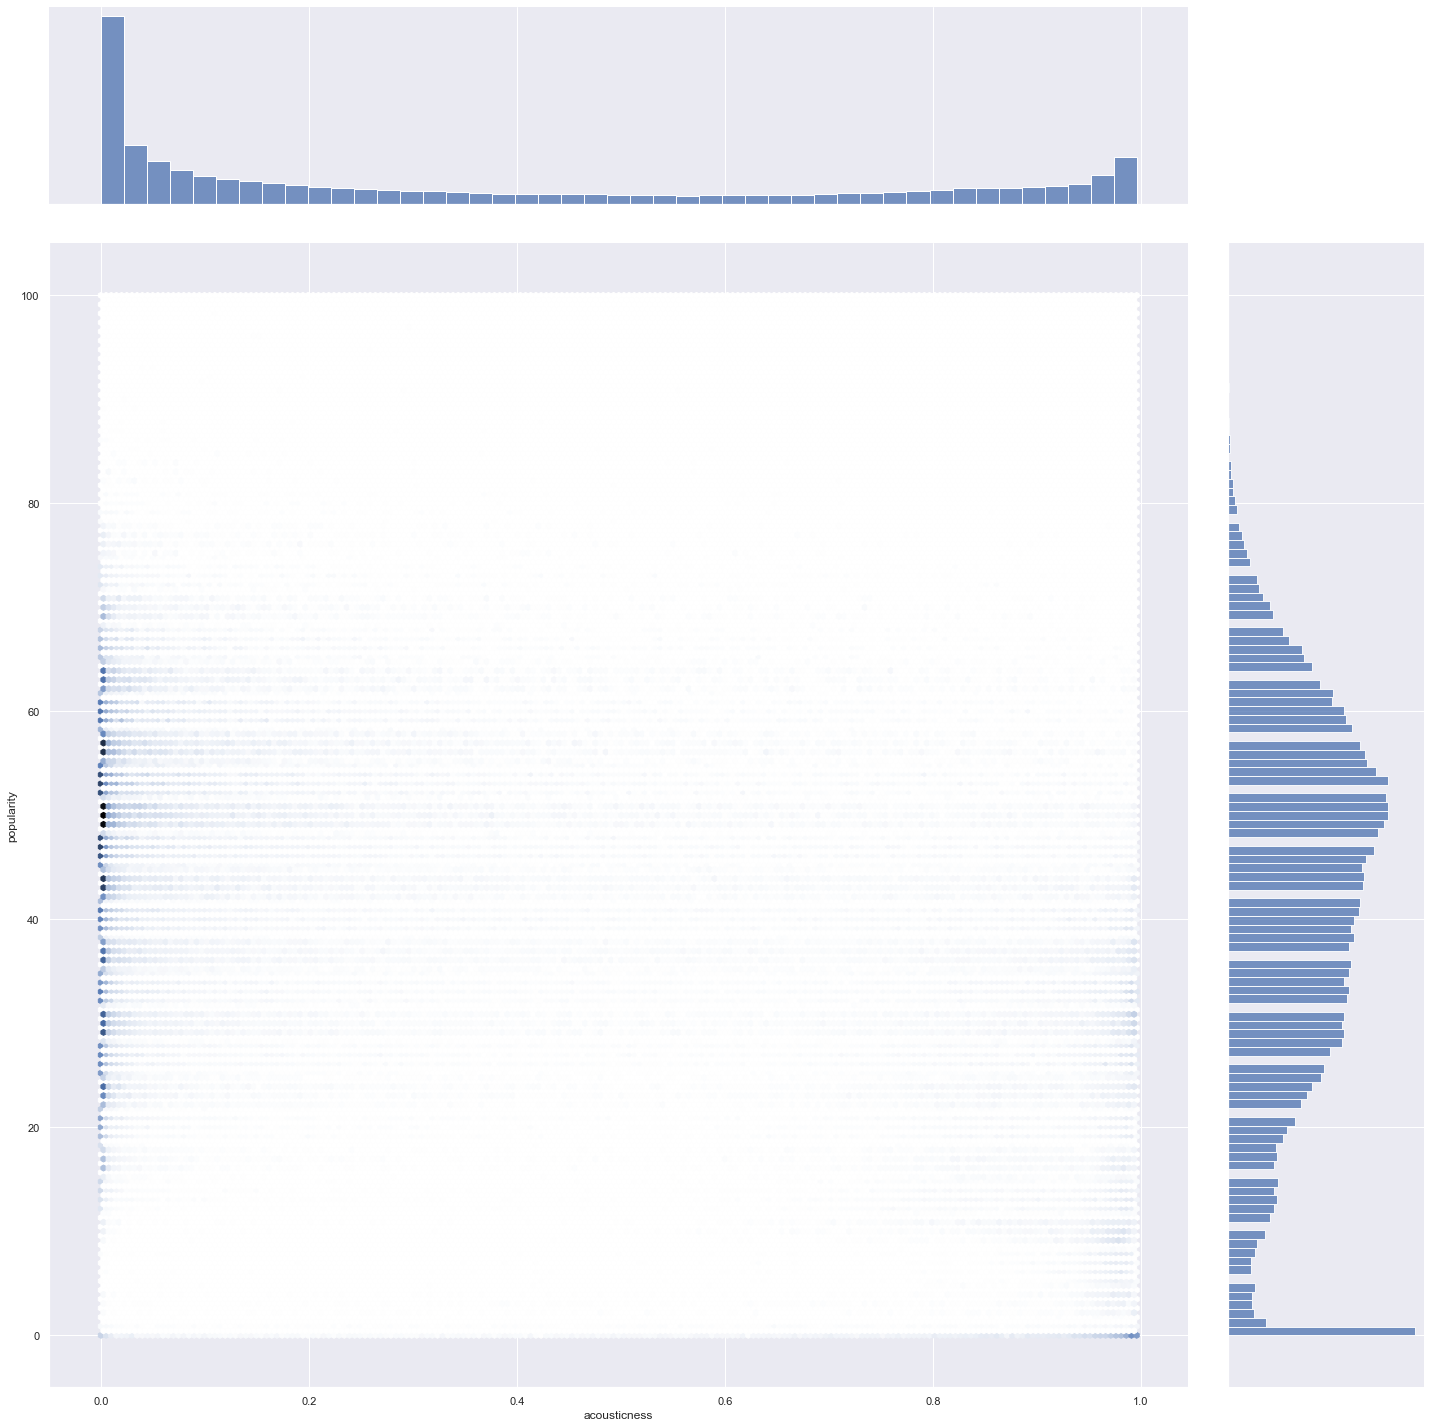

In [15]:
sns.jointplot(data=df[["popularity", "acousticness"]], x="acousticness", y="popularity", height=20,kind="hex", gridsize=200)

<font size="5">As we can see, acoustiness badly affects popularity of track. I have used hex kind of jointplot because usual points in usual kind of jointplot are too densed.

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

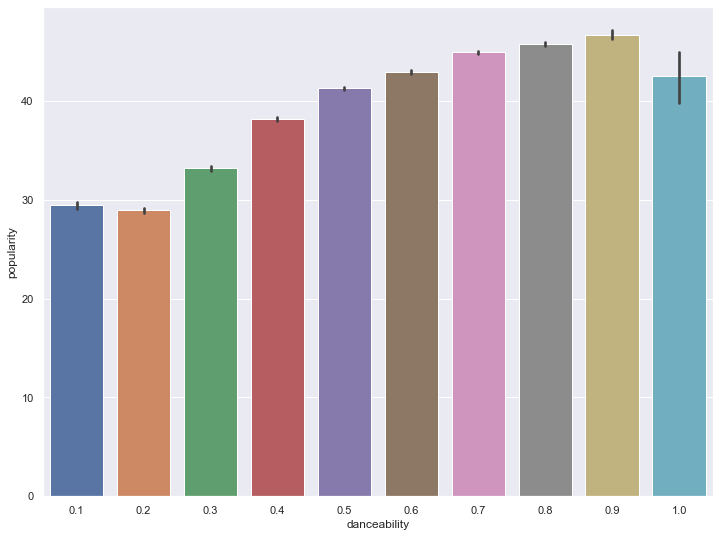

In [8]:
df_danceability=np.round(df[["danceability", "popularity"]], 1)
sns.barplot(x="danceability", y="popularity", data=df_danceability)

<font size="5">Based on this graph, you can see that danceability affects the popularity of songs. The higher the danceability, the more people on average will listen to this song.

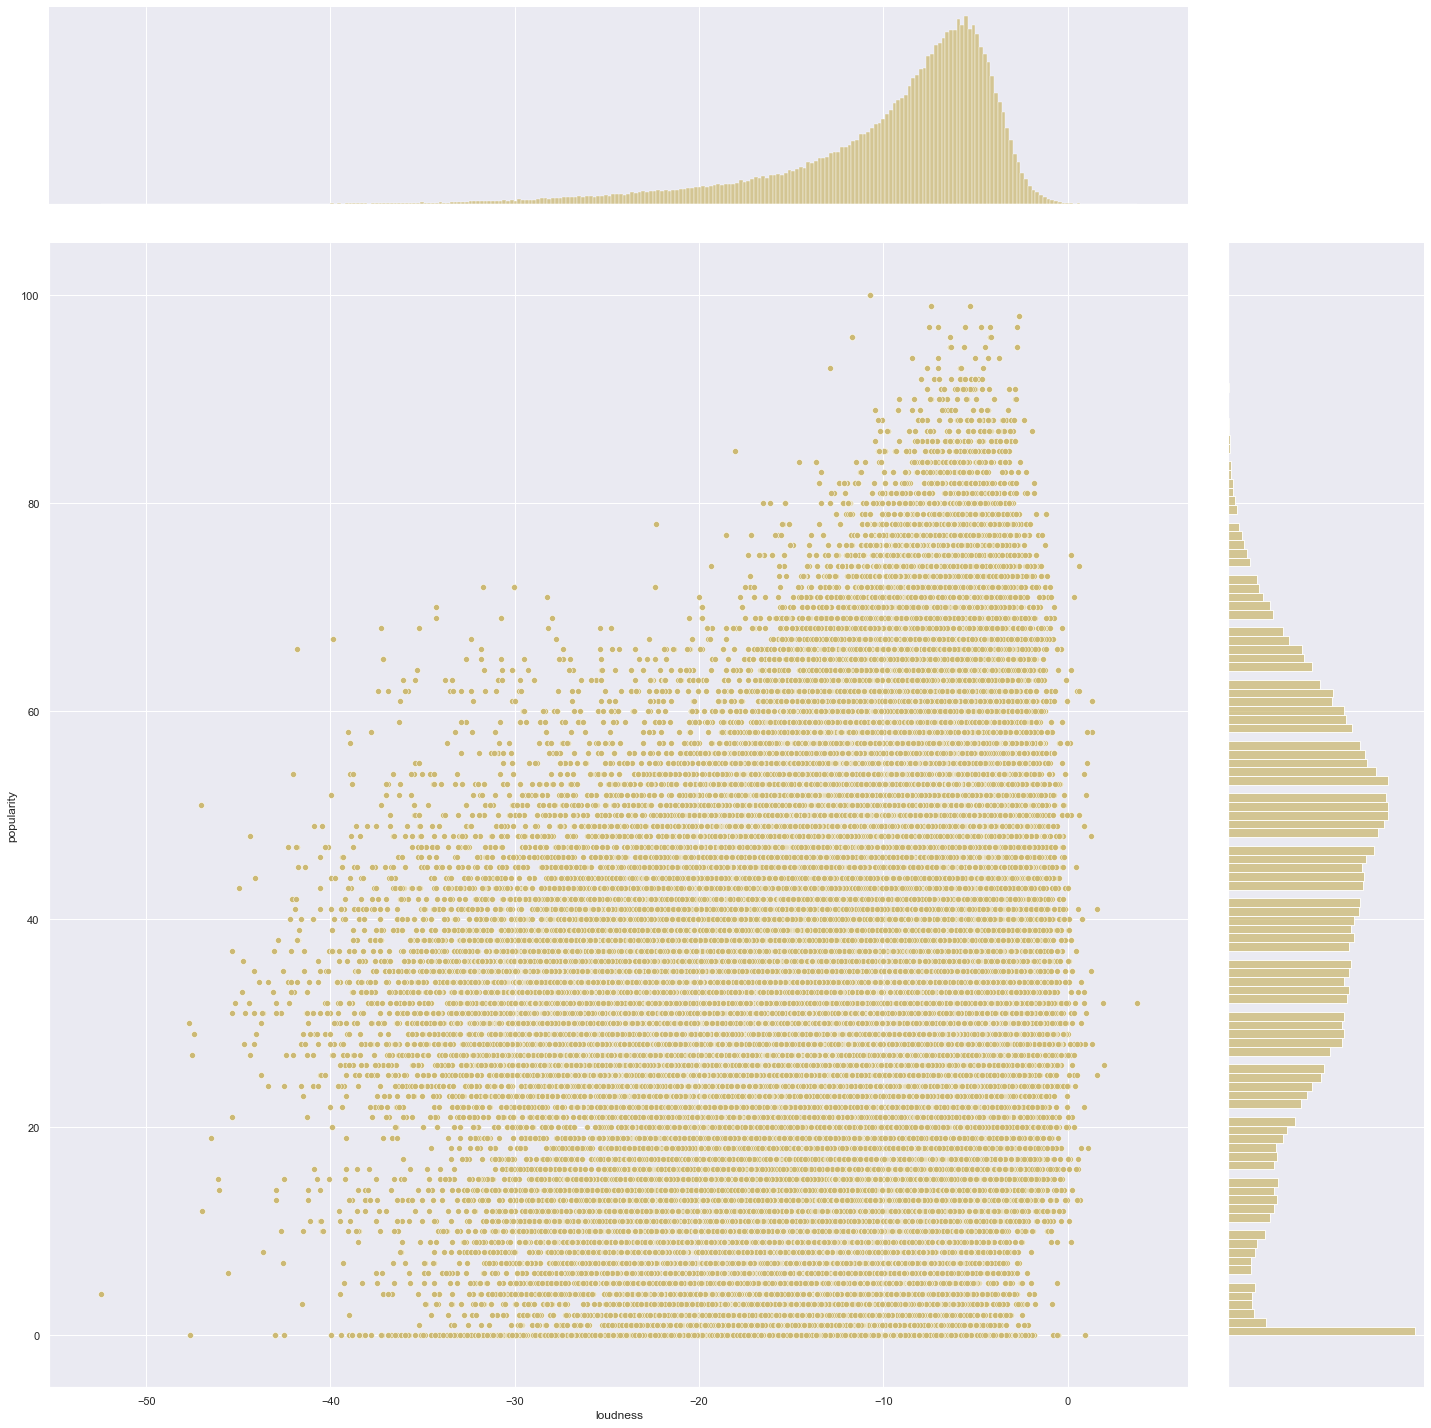

In [31]:
features = ["popularity", "loudness"]
sns.jointplot(data=df[features], x="loudness", y="popularity", height=20, color='y', dropna=True)

sds

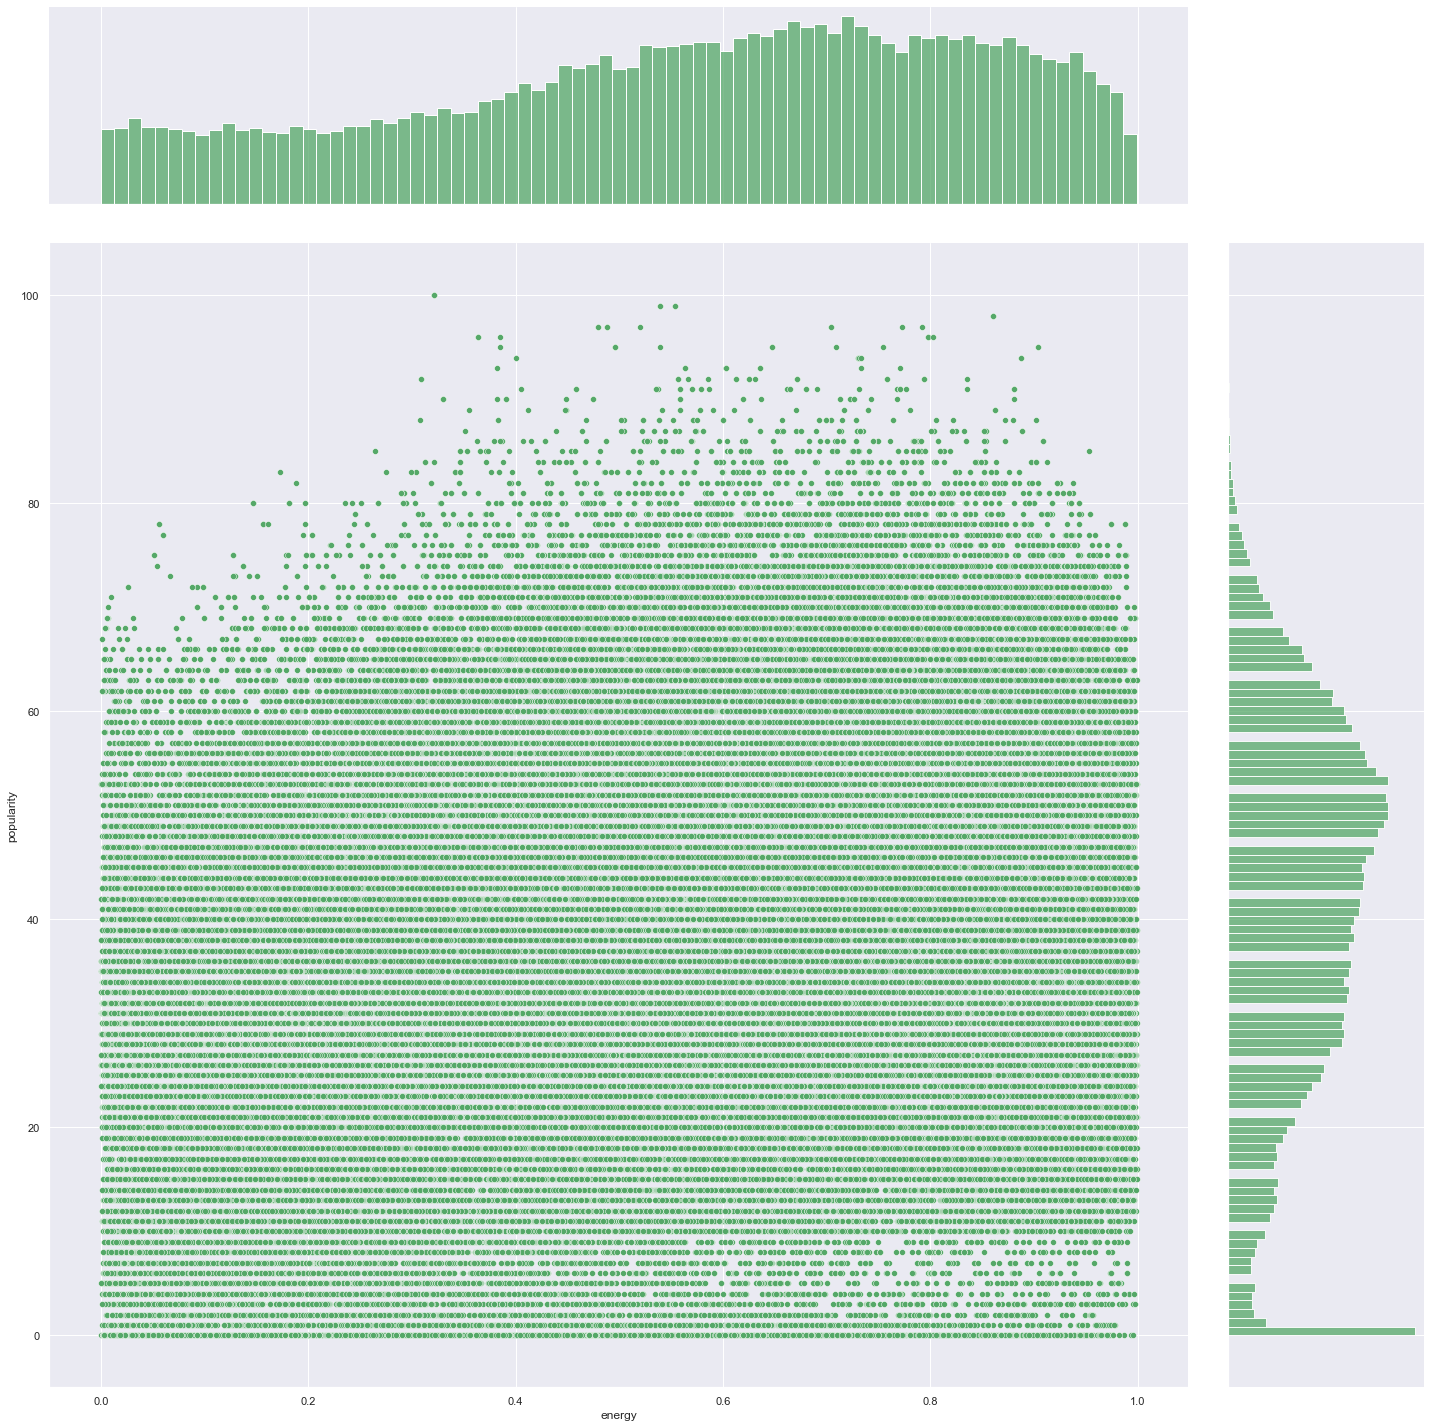

In [25]:
features = ["popularity", "energy"]
sns.jointplot(data=df[features], x="energy", y="popularity", height=20, color='g')

Здесь имеем примерно равн

<AxesSubplot:>

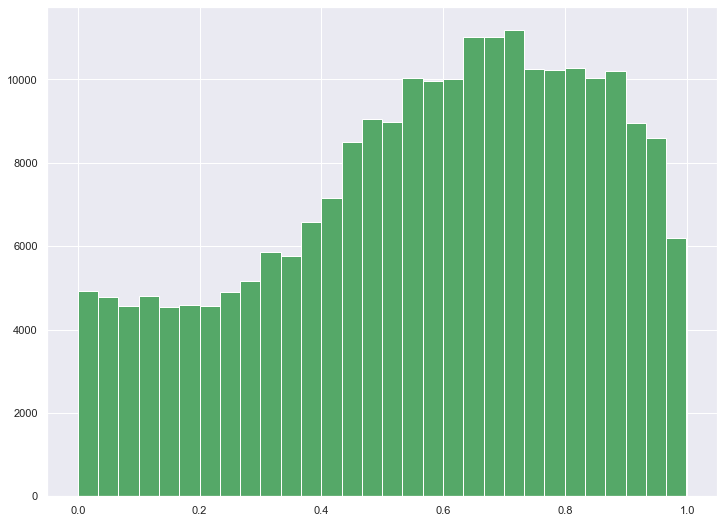

In [40]:
df["energy"].hist(bins=30, color='g')

<AxesSubplot:xlabel='energy', ylabel='popularity'>

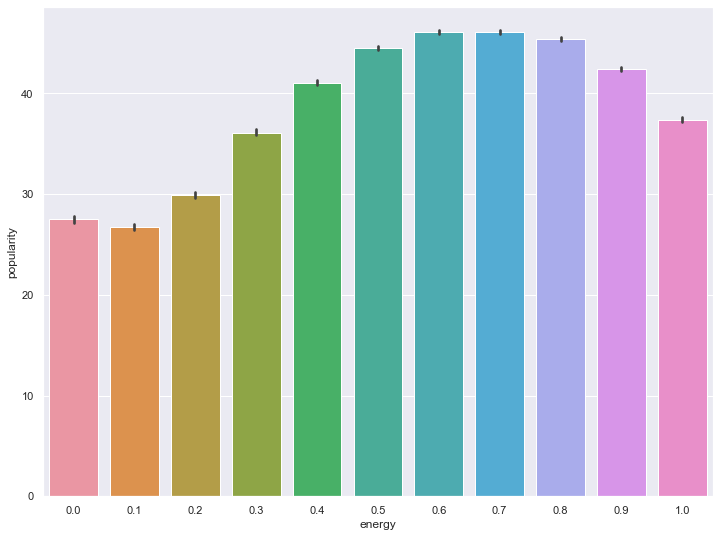

In [41]:
df_energy=np.round(df[["energy", "popularity"]], 1)
sns.barplot(x="energy", y="popularity", data=df_energy)

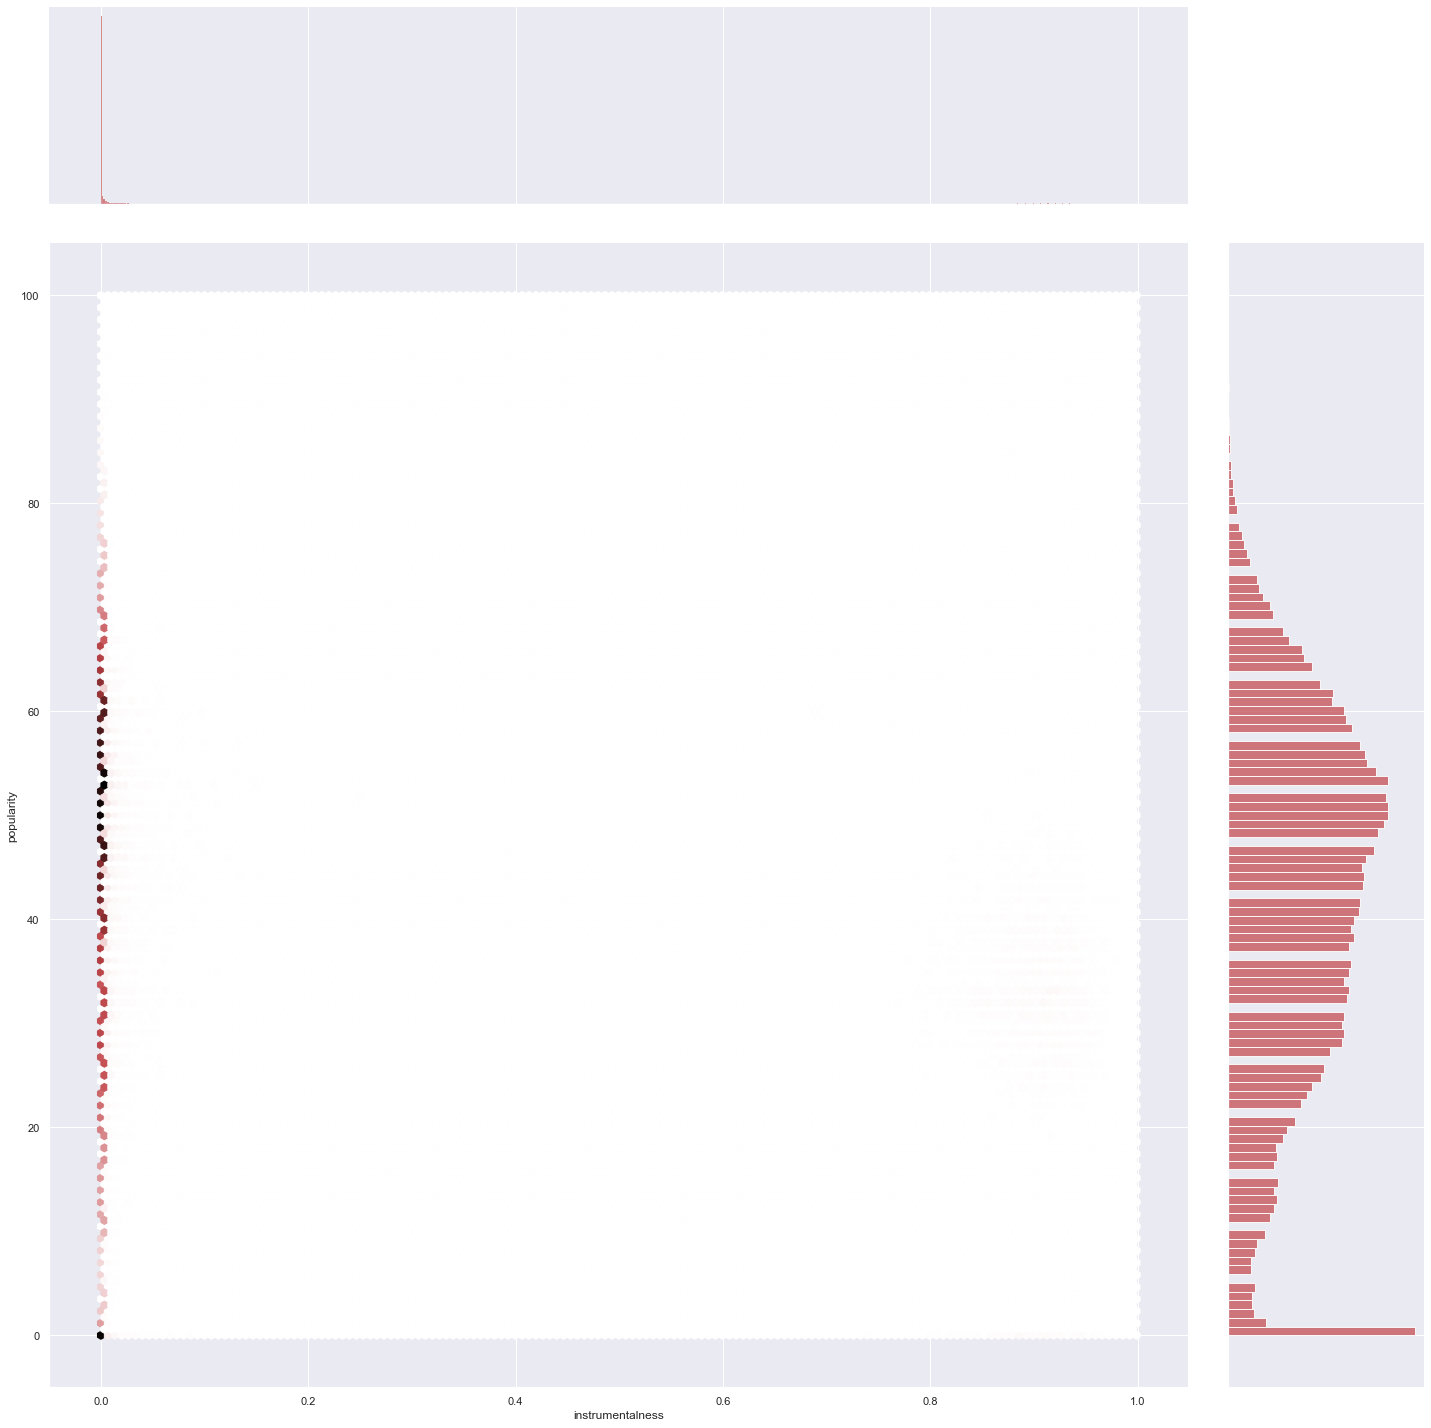

In [37]:
features = ["popularity", "instrumentalness"]
sns.jointplot(data=df[features], x="instrumentalness", y="popularity", height=20, color='r', kind="hex", gridsize=150)

<AxesSubplot:>

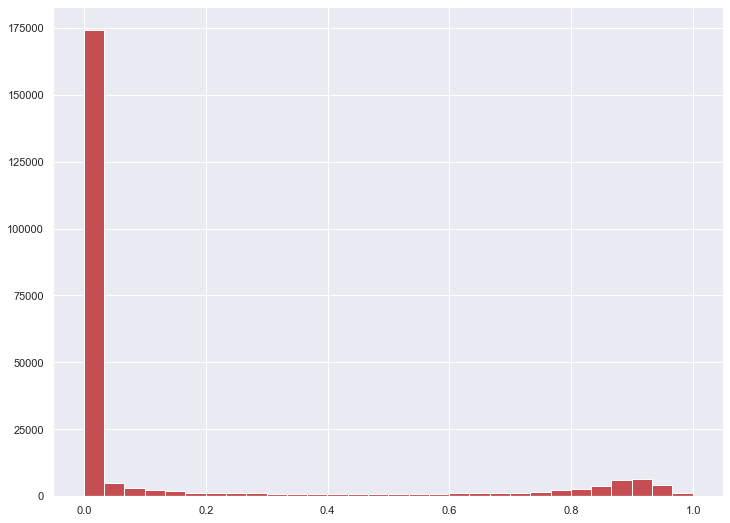

In [32]:
df["instrumentalness"].hist(bins=30, color='r')

<AxesSubplot:xlabel='instrumentalness', ylabel='popularity'>

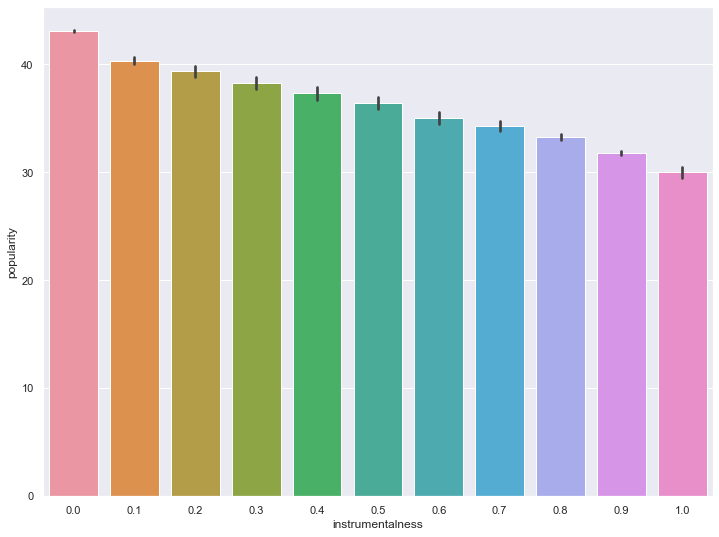

In [39]:
df_instrumentalness=np.round(df[["instrumentalness", "popularity"]], 1)
sns.barplot(x="instrumentalness", y="popularity", data=df_instrumentalness)

<AxesSubplot:xlabel='mode', ylabel='popularity'>

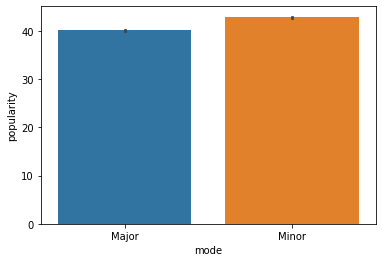

In [3]:
sns.barplot(x='mode', y='popularity', data=df)

<AxesSubplot:xlabel='mode', ylabel='popularity'>

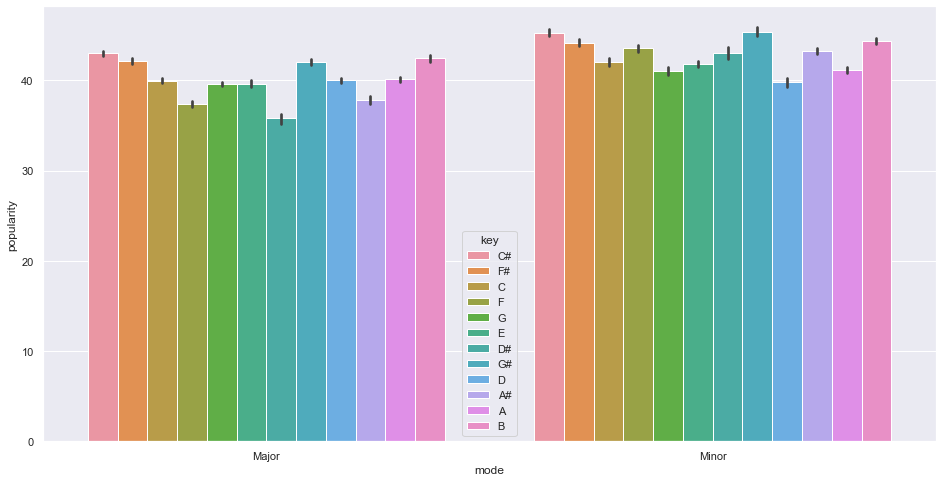

In [9]:
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x='mode', y='popularity', hue='key', data=df)